In [1]:
from tqdm import tqdm
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, coo_matrix
import pickle as pkl
import csv
import pandas as pd
import numpy as np
import os
import random
import scipy.io as sio
import cufflinks as cf

In [2]:
network = pkl.load(open('{}.pkl'.format("ddb"), "rb"))
network.keys()
network['edge_type2index']

{0: 'belong(s) to the category of',
 1: 'is a category subset of',
 2: 'may cause',
 3: 'is a subtype of',
 4: 'is a risk factor for',
 5: 'is associated with',
 6: 'may contraindicate',
 7: 'interacts with',
 8: 'belongs to the drug family of',
 9: 'belongs to drug super-family',
 10: 'is a vector for',
 11: 'may be allelic with',
 12: 'see also',
 13: 'is an ingredient of'}

In [3]:
print(network['splits'].keys())
edges = network['splits']['train_edges'] + network['splits']['val_edges'] + network['splits']['test_edges']
len(edges) #[(0, 1, 0)]

dict_keys(['train_edges', 'val_edges', 'test_edges'])


44561

In [4]:
edges = np.array(edges)
edges.shape

(44561, 3)

In [5]:
np.where(edges==0)

(array([    0,     0,     1, ..., 44550, 44558, 44560]),
 array([0, 2, 2, ..., 2, 2, 2]))

In [6]:
edges

array([[   0,    1,    0],
       [   2,    1,    0],
       [   4,    1,    0],
       ...,
       [7324, 6810,    0],
       [2458,  633,   12],
       [2260, 6810,    0]])

In [7]:
np.count_nonzero(edges==0, axis=0)

array([   1,    5, 9215])

In [8]:
edge_type_distribution = dict.fromkeys(network['edge_type2index'], 0)
for k in edge_type_distribution.keys():
    edge_type_distribution[k] += np.count_nonzero(edges==k, axis=0)[-1]
edge_type_distribution

{0: 9215,
 1: 75,
 2: 27429,
 3: 1023,
 4: 1143,
 5: 358,
 6: 551,
 7: 876,
 8: 2879,
 9: 132,
 10: 100,
 11: 329,
 12: 445,
 13: 6}

In [9]:
sum(edge_type_distribution.values())

44561

In [15]:
df  = pd.DataFrame(edges, columns=['target', 'source', 'relation'])
df

,target,source,relation
0,0,1,0
1,2,1,0
2,4,1,0
3,5,1,0
4,6,1,0
...,...,...,...
44556,56,3204,2
44557,59,5555,2
44558,7324,6810,0
44559,2458,633,12


In [16]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

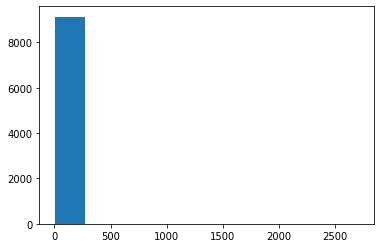

In [17]:
G = nx.from_pandas_edgelist(df, 'target', 'source', ['relation'])
plot_degree_dist(G)

[0, 746, 1763, 1323, 1001, 715, 577, 493, 357, 328, 254, 172, 136, 123, 112, 100, 78, 70, 48, 49, 48, 39, 40, 40, 36, 34, 18, 18, 24, 18, 24, 7, 14, 13, 10, 12, 10, 14, 9, 9, 4, 8, 11, 7, 7, 6, 7, 4, 7, 3, 9, 5, 11, 7, 8, 3, 4, 1, 4, 2, 7, 3, 1, 5, 2, 6, 2, 9, 5, 4, 0, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 3, 1, 0, 5, 0, 0, 0, 1, 3, 4, 0, 1, 0, 1, 0, 2, 4, 3, 5, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

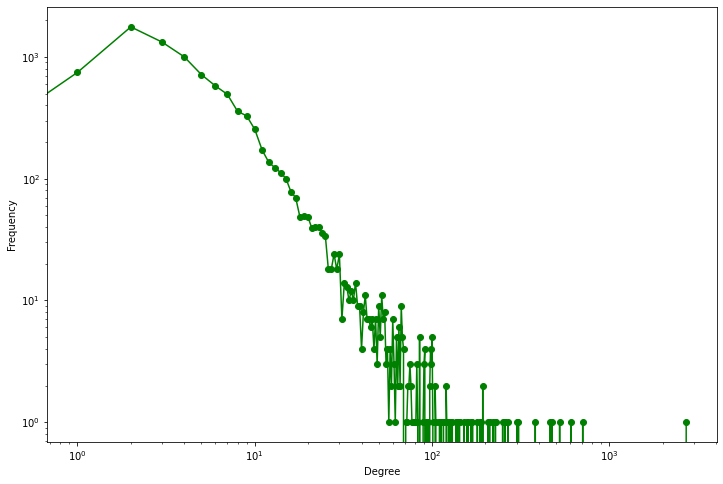

In [27]:
degree_freq = nx.degree_histogram(G)
print(degree_freq)
degrees = range(len(degree_freq))
print(degrees)
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.savefig("ddb_degree_distribution.png")

In [22]:
len(list(G.nodes()))

9144

In [25]:
print(len(degree_freq))
print(sum(degree_freq))

2712
9144


In [24]:
len(list(nx.isolates(G)))

0

In [29]:
import networkx as nx
import scipy.sparse as sp
import numpy as np
from scipy.sparse.csgraph import connected_components, minimum_spanning_tree
import warnings
from matplotlib import pyplot as plt
import igraph
#import powerlaw
from numba import jit

In [31]:
A_in = nx.to_scipy_sparse_matrix(G)
A_in

<9144x9144 sparse matrix of type '<class 'numpy.int64'>'
	with 81030 stored elements in Compressed Sparse Row format>

In [34]:
A = A_in.copy()
statistics = {}

In [39]:
def squares(g):
    """
    Count the number of squares for each node
    Parameters
    ----------
    g: igraph Graph object
       The input graph.
    Returns
    -------
    List with N entries (N is number of nodes) that give the number of squares a node is part of.
    """

    cliques = g.cliques(min=4, max=4)
    result = [0] * g.vcount()
    for i, j, k, l in cliques:
        result[i] += 1
        result[j] += 1
        result[k] += 1
        result[l] += 1
    return result

def statistics_degrees(A_in):
    """
    Compute min, max, mean degree
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    d_max. d_min, d_mean
    """

    degrees = A_in.sum(axis=0)
    return np.max(degrees), np.min(degrees), np.mean(degrees)

def statistics_LCC(A_in):
    """
    Compute the size of the largest connected component (LCC)
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Size of LCC
    """

    unique, counts = np.unique(connected_components(A_in)[1], return_counts=True)
    LCC = np.where(connected_components(A_in)[1] == np.argmax(counts))[0]
    return LCC

def statistics_wedge_count(A_in):
    """
    Compute the wedge count of the input graph
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    The wedge count.
    """

    degrees = A_in.sum(axis=0)
    return float(np.sum(np.array([0.5 * x * (x - 1) for x in degrees])))


def statistics_claw_count(A_in):
    """
    Compute the claw count of the input graph
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Claw count
    """

    degrees = A_in.sum(axis=0)
    return float(np.sum(np.array([1 / 6. * x * (x - 1) * (x - 2) for x in degrees])))

def statistics_triangle_count(A_in):
    """
    Compute the triangle count of the input graph
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Triangle count
    """

    A_graph = nx.from_numpy_matrix(A_in)
    triangles = nx.triangles(A_graph)
    t = np.sum(list(triangles.values())) / 3
    return int(t)


def statistics_square_count(A_in):
    """
    Compute the square count of the input graph
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Square count
    """

    A_igraph = igraph.Graph.Adjacency((A_in > 0).tolist()).as_undirected()
    return int(np.sum(squares(A_igraph)) / 4)

def statistics_gini(A_in):
    """
    Compute the Gini coefficient of the degree distribution of the input graph
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Gini coefficient
    """

    n = A_in.shape[0]
    degrees = A_in.sum(axis=0)
    degrees_sorted = np.sort(degrees)
    G = (2 * np.sum(np.array([i * degrees_sorted[i] for i in range(len(degrees))]))) / (n * np.sum(degrees)) - (
                                                                                                               n + 1) / n
    return float(G)


def statistics_edge_distribution_entropy(A_in):
    """
    Compute the relative edge distribution entropy of the input graph.
    Parameters
    ----------
    A_in: sparse matrix or np.array
          The input adjacency matrix.
    Returns
    -------
    Rel. edge distribution entropy
    """

    degrees = A_in.sum(axis=0)
    m = 0.5 * np.sum(np.square(A_in))
    n = A_in.shape[0]

    H_er = 1 / np.log(n) * np.sum(-degrees / (2 * float(m)) * np.log((degrees+.0001) / (2 * float(m))))
    return H_er

def statistics_cluster_props(A, Z_obs):
    def get_blocks(A_in, Z_obs, normalize=True):
        block = Z_obs.T.dot(A_in.dot(Z_obs))
        counts = np.sum(Z_obs, axis=0)
        blocks_outer = counts[:,None].dot(counts[None,:])
        if normalize:
            blocks_outer = np.multiply(block, 1/blocks_outer)
        return blocks_outer
    
    in_blocks = get_blocks(A, Z_obs)
    diag_mean = np.multiply(in_blocks, np.eye(in_blocks.shape[0])).mean()
    offdiag_mean = np.multiply(in_blocks, 1-np.eye(in_blocks.shape[0])).mean() 
    return diag_mean, offdiag_mean

def statistics_compute_cpl(A):
    """Compute characteristic path length."""
    P = sp.csgraph.shortest_path(sp.csr_matrix(A))

In [46]:
#A = A.A
d_max, d_min, d_mean = statistics_degrees(A)

# Degree statistics
statistics['d_max'] = d_max
statistics['d_min'] = d_min
statistics['d'] = d_mean

# largest connected component
LCC = statistics_LCC(A)

statistics['LCC'] = LCC.shape[0]
# wedge count
statistics['wedge_count'] = statistics_wedge_count(A)

# claw count
statistics['claw_count'] = statistics_claw_count(A)

# triangle count
statistics['triangle_count'] = statistics_triangle_count(A)

# Square count
statistics['square_count'] = statistics_square_count(A)

# power law exponent
# statistics['power_law_exp'] = statistics_power_law_alpha(A)

# gini coefficient
statistics['gini'] = statistics_gini(A)

# Relative edge distribution entropy
statistics['rel_edge_distr_entropy'] = statistics_edge_distribution_entropy(A)

# Assortativity
# statistics['assortativity'] = nx.degree_assortativity_coefficient(A_in)

# Clustering coefficient
statistics['clustering_coefficient'] = 3 * statistics['triangle_count'] / statistics['claw_count']

# Number of connected components
statistics['n_components'] = connected_components(A)[0]
    
#if Z_obs is not None:
#    # inter- and intra-community density
#    intra, inter = statistics_cluster_props(A, Z_obs)
#    statistics['intra_community_density'] = intra
#    statistics['inter_community_density'] = inter
      
statistics['cpl'] = statistics_compute_cpl(A)

In [47]:
statistics

{'d_max': 2711,
 'd_min': 1,
 'd': 8.861548556430446,
 'LCC': 9144,
 'wedge_count': 5924305.0,
 'claw_count': 3536762685.0,
 'triangle_count': 10864,
 'square_count': 1369,
 'gini': 0.5973788452458499,
 'rel_edge_distr_entropy': 0.8978197572960855,
 'clustering_coefficient': 9.215206928705764e-06,
 'n_components': 1,
 'cpl': None}

In [48]:
statistics_compute_cpl(A)